# Introduction to Neural Networks With Iris Dataset

*****************************************************
![Alt text](irises.png)

In [48]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
import pandas as pd
import numpy as np
np.random.seed(10)

matplotlib.rc('font', size=15)
plt.rc('legend', fontsize='large')
plt.rc('xtick',labelsize='large')
plt.rc('ytick',labelsize='large')
plt.rc('lines',linewidth=4)

# import iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df["species"]= df["target"]
df.replace(dict(species=dict(zip(range(3),iris.target_names))), inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa




# Features (Parameters)
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

*****************************************************
![Alt text](03_iris.png)


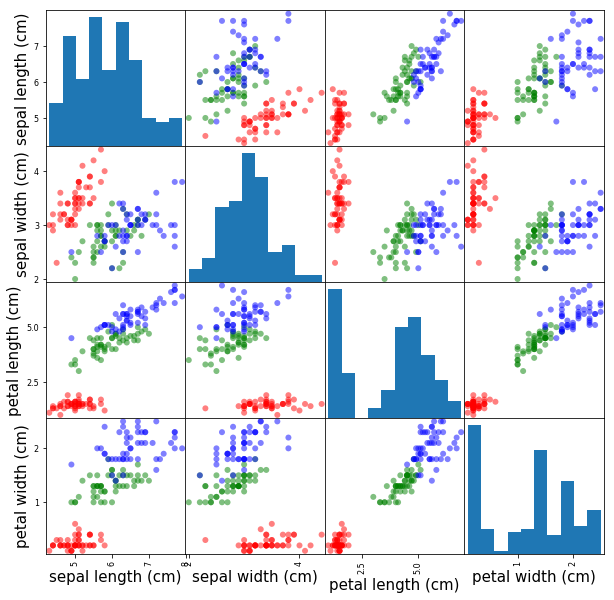

In [49]:
colors = list()
palette = {"setosa": "red", "versicolor": "green", "virginica": "blue"}
for c in df['species']: colors.append(palette.get(c))
scatter_matrix(df.drop(['target','species'], axis=1),figsize=[10,10],marker='o',c=colors)
plt.show()

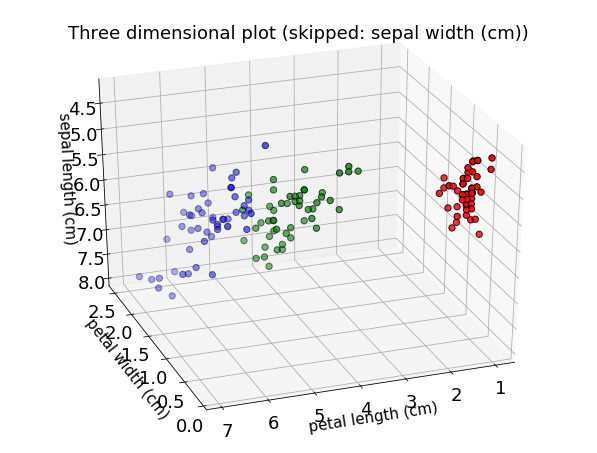

In [50]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df['petal length (cm)'], df['petal width (cm)'], df['sepal length (cm)'], c=colors,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Three dimensional plot (skipped: sepal width (cm))")
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_zlabel('sepal length (cm)')
plt.show()

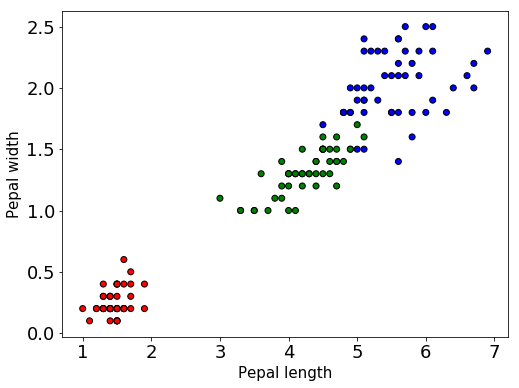

In [51]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=colors, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Pepal length')
plt.ylabel('Pepal width')
plt.show()

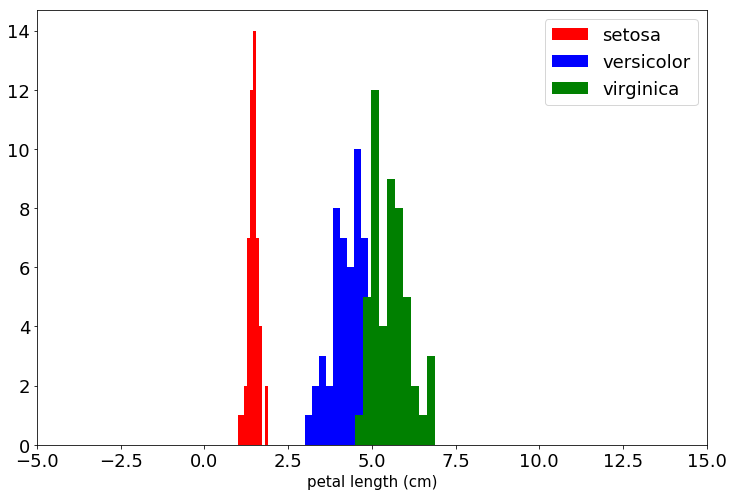

In [52]:
def plot_hist(x, y):
    colors= ['red', 'blue', 'green']      
    fig, ax = plt.subplots(figsize=(12,8))
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(x[y==label], label=iris.target_names[label], color=color)
        plt.legend(loc='upper right')
    plt.xlim(-5, 15)
    plt.xlabel('petal length (cm)')
plot_hist(df['petal length (cm)'], df['target'])
plt.show()

## For simplicity let's assume that we have to predict
## if type is *setosa* or *not setosa*

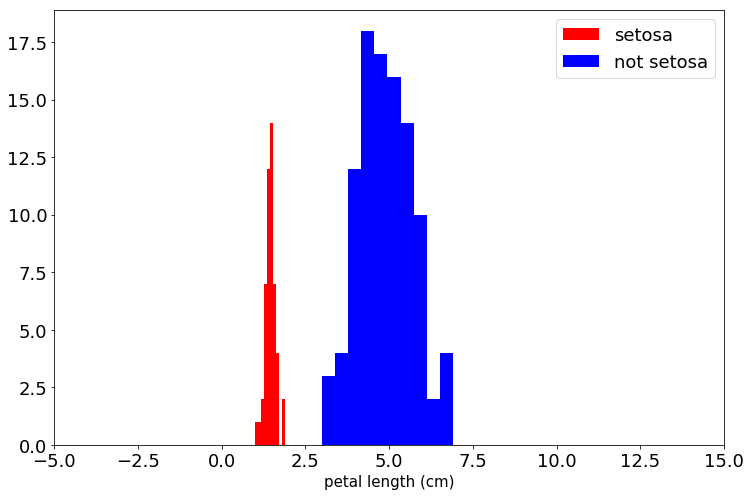

In [53]:
df['not setosa'] = (~(df['target'] == 0)).apply(int)
plot_hist(df['petal length (cm)'], df['not setosa'])
plt.legend(["setosa", "not setosa"])
plt.show()

# Sigmoid Function
# ${\displaystyle f(z)={\frac {1}{1+e^{-z}}}}$

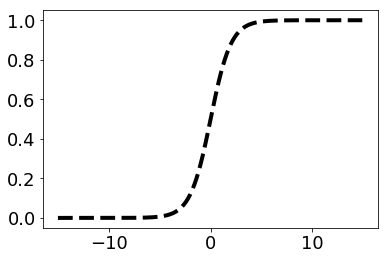

In [54]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))
z=np.arange(-15,15,0.1)
plt.plot(z, sigmoid(z), 'k--')
plt.show()

# Logitic Regression (Sigmoid activation function)
# ${\displaystyle f(x)={\frac {1}{1+e^{-(Wx+B)}}}}$
# Regression model that predicts binary categorical dependent variable

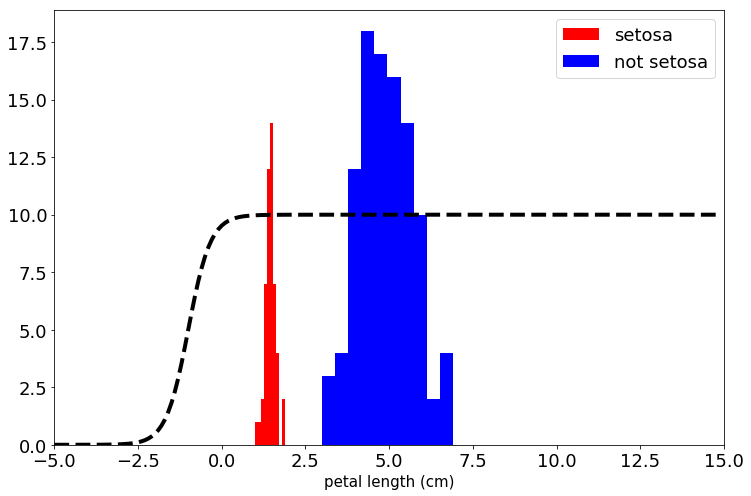

In [55]:
petal_lengths = np.arange(-5,15,0.1)
def plot_logistic_regression(x, w,b):
    y=sigmoid(w*x+b)
    plt.plot(x, 10*y, 'k--')
plot_hist(df['petal length (cm)'], df['not setosa'])
plt.legend(["setosa", "not setosa"])
plot_logistic_regression(x=petal_lengths, w=3, b=3) 
plt.show()

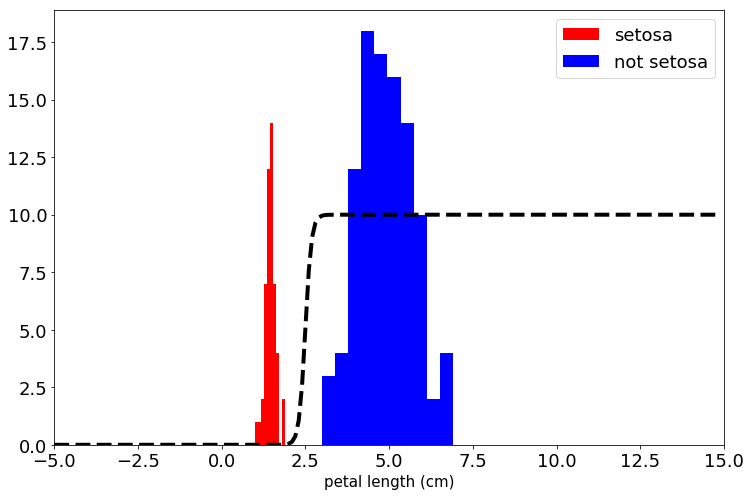

W: 10.91, b: -27.23


In [56]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(C=1e5)#regularization
logistic.fit(df['petal length (cm)'].values.reshape(-1, 1), df['not setosa'])
w = float(logistic.coef_)
b = float(logistic.intercept_)

plot_hist(df['petal length (cm)'], df['not setosa'])
plt.legend(["setosa", "not setosa"])
plot_logistic_regression(petal_lengths, w, b)
plt.show()
print("W: {:.2f}, b: {:.2f}".format(w, b))

# Neural Networks with Keras
* ### Keras is a python library for neural networks (others: Tensorflow, pytorch, theano, etc.)
* ### The primitive neural network is logistic regression
![Alt text](LinearRegression.png)


* Sigmoid Function (one of NN activation functions)
* ${\displaystyle f(z)={\frac {1}{1+e^{-z}}}}$
* One of activation functions in artificial neural networks.
* It decide whether a neuron should be activated or not.
  * Whether the information that the neuron is receiving is relevant for the given information or should it be ignored.

Epoch 1/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4585 - acc: 0.6667
Epoch 2/10
150/150 [==============================] - 0s 0us/step - loss: 0.4465 - acc: 0.6667
Epoch 3/10
150/150 [==============================] - 0s 0us/step - loss: 0.4177 - acc: 0.6667
Epoch 4/10
150/150 [==============================] - 0s 27us/step - loss: 0.3953 - acc: 0.6667
Epoch 5/10
150/150 [==============================] - 0s 13us/step - loss: 0.3723 - acc: 0.6933
Epoch 6/10
150/150 [==============================] - 0s 20us/step - loss: 0.3503 - acc: 0.9133
Epoch 7/10
150/150 [==============================] - 0s 20us/step - loss: 0.3305 - acc: 0.9867
Epoch 8/10
150/150 [==============================] - 0s 13us/step - loss: 0.3138 - acc: 1.0000
Epoch 9/10
150/150 [==============================] - 0s 13us/step - loss: 0.3003 - acc: 1.0000
Epoch 10/10
150/150 [==============================] - 0s 13us/step - loss: 0.2902 - acc: 1.0000


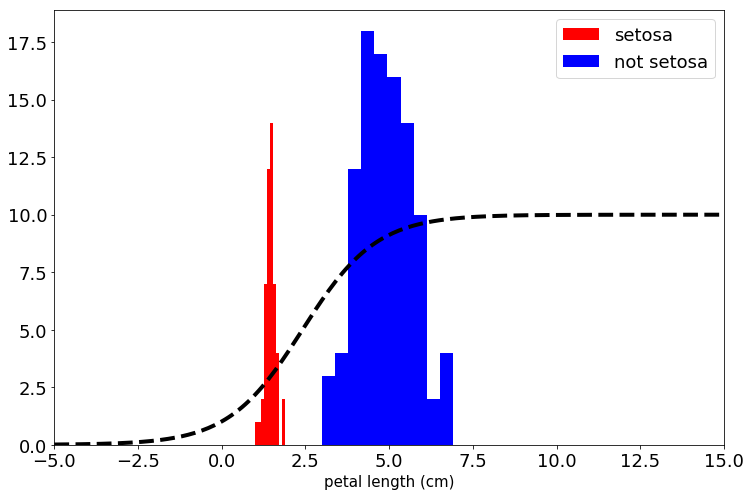

(0.9042863249778748, -2.180316925048828)

In [57]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers, regularizers
from sklearn.metrics import accuracy_score
from keras_tqdm import TQDMNotebookCallback
       
model = Sequential()
model.add(Dense(1, activation = "sigmoid", input_dim=1 , kernel_regularizer=regularizers.l2(0.1)))
sgd = optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])
model.fit(df['petal length (cm)'],df['not setosa'], epochs=10, batch_size=150)
w, b = [float(i) for i in model.get_weights()]

plot_hist(df['petal length (cm)'],df['not setosa'])
plt.legend(["setosa", "not setosa"])
plot_logistic_regression(petal_lengths, w, b)
plt.show()
w, b

\begin{align}
\text{Binary Cross Enthropy}: -\frac{1}{N}\sum_{i=1}^{N} y_ilog(\hat{y}_i)+(1−y_i)log(1−\hat{y}_i)
\end{align}

# Back Propagation
# How it works?
![Alt text](Neural Networks GIF-source.gif)

In [58]:
from keras import regularizers, optimizers, callbacks
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(1 , input_dim=1, kernel_regularizer=regularizers.l2(0.1)))# 
model.add(Activation('sigmoid') )

sgd = optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

w_grid, b_grid = np.mgrid[ -5:5:.1 , -15:15:.1 ]

def get_loss( w , b ):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[ w ]]) , np.array([ b ]) ] ) 
    loss = model.evaluate(df['petal length (cm)'], df['not setosa'], verbose=0)[0]
    return loss

vloss = np.vectorize(get_loss)
loss_grid = vloss(w_grid,b_grid)

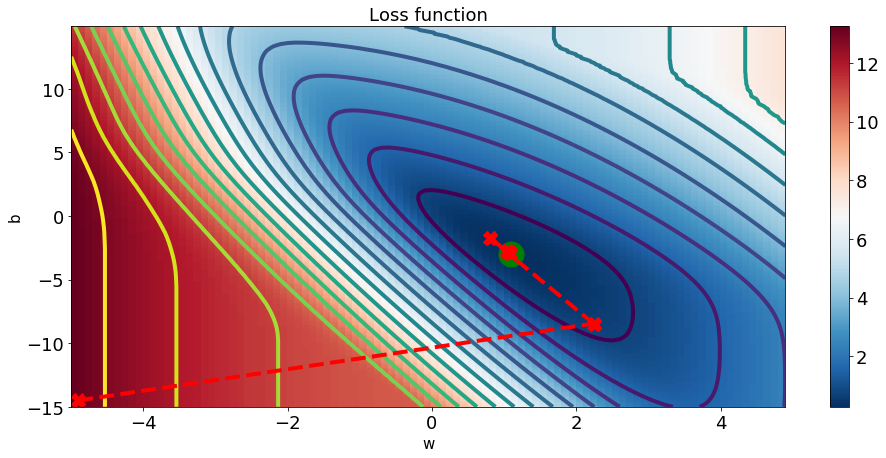

In [59]:
fig , ax_loss = plt.subplots(figsize=(16,7))
plt.pcolormesh(w_grid , b_grid , loss_grid  , cmap='RdBu_r')
plt.colorbar(); plt.contour(w_grid, b_grid, loss_grid,20)
plt.title('Loss function'); plt.xlabel('w'); plt.ylabel('b');
plt.plot([w_grid[np.where(loss_grid == loss_grid.min())]], [b_grid[np.where(loss_grid == loss_grid.min())]], marker='o', markersize=25, color="g")
model.layers[0].set_weights( [ np.array([[-4.9]]) , np.array([-14.5]) ] ) 

class LossHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
for i in range(15):
    old_w , old_b = [np.asscalar(x) for x in model.get_weights()]
    model.fit(df['petal length (cm)'],df['not setosa'], epochs=20, batch_size=len(df), verbose=0 )
    new_w , new_b =[np.asscalar(x) for x in model.get_weights()]
    plt.plot( [ old_w , new_w ] , [ old_b , new_b ], 'rX--' , markersize=14 )    
plt.show()

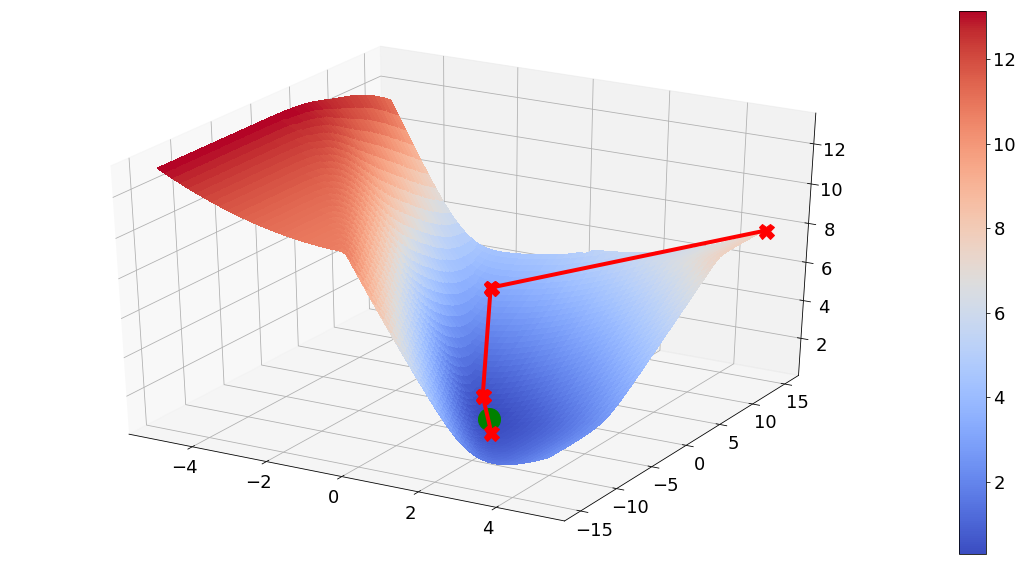

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

w_min = w_grid[np.where(loss_grid == loss_grid.min())]
b_min = b_grid[np.where(loss_grid == loss_grid.min())]
loss_min = loss_grid.min()

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w_grid, b_grid, loss_grid, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf)
plt.plot([w_min], [b_min], [loss_min], marker='o', markersize=22, color="g")
model.layers[0].set_weights( [ np.array([[5]]) , np.array([15]) ] ) 
for i in range(3):
    old_w , old_b = [np.asscalar(x) for x in model.get_weights()]
    old_loss = model.evaluate(df['petal length (cm)'],df['not setosa'], verbose=0)[0]
    model.fit(df['petal length (cm)'],df['not setosa'], epochs=11, batch_size=len(df), verbose=0 )
    new_w , new_b = [np.asscalar(x) for x in model.get_weights()]
    new_loss = model.evaluate(df['petal length (cm)'],df['not setosa'], verbose=0)[0]
    plt.plot( [ old_w , new_w ] , [ old_b , new_b ] , [old_loss, new_loss], 'rX-' , markersize=15 )    
plt.show()

## Now we want to separate versicolor vs. others

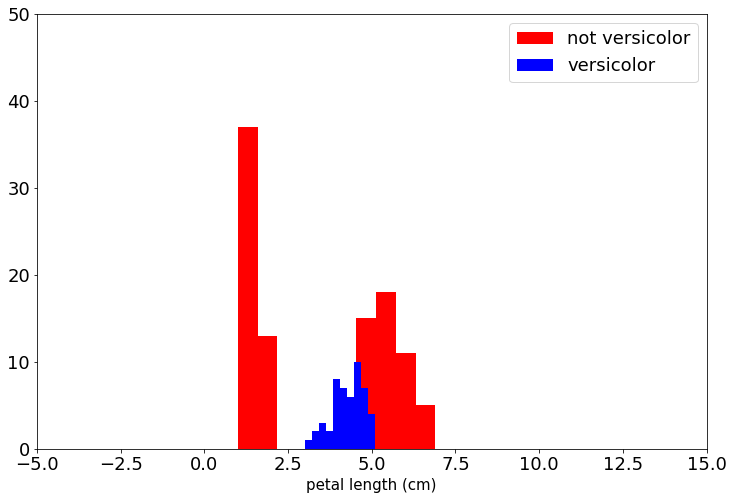

In [61]:
# virginica to setosa
df['not versicolor'] = ((df['target'] == 1)).apply(int)
plot_hist(df['petal length (cm)'], df['not versicolor'])
plt.legend(["not versicolor", "versicolor"])
plt.ylim(0, 50)
plt.show()

In [62]:
def some_function(z, mju, sigma):
    return np.exp(-0.5*np.power((z-mju)/sigma,2))/(sigma*np.sqrt(2*np.pi))
def plot_function(mju,sigma):
    x=np.arange(-5,15,0.01)
    y=some_function(x, mju, sigma)
    plt.plot(x, 30*y, 'k')

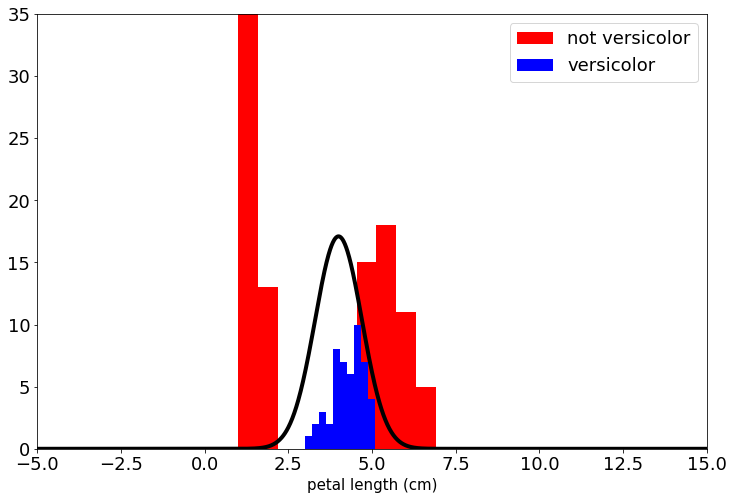

In [63]:
plot_hist(df['petal length (cm)'],df['not versicolor'])
plt.legend(["not versicolor", "versicolor"])
plot_function(4,0.7)
plt.ylim(0, 35)
plt.show()

## Neural Network with 2 hidden layers
![Alt text](Neural Network.png)

In [64]:
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.metrics import accuracy_score
from keras.models import load_model
np.random.seed(10)
model = Sequential()
model.add(Dense(3, activation = "sigmoid", input_dim=1))
model.add(Dense(1, activation = "sigmoid"))
# model = load_model('my_model.h5') Not always the model fits the result because of random weight initialization
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy', metrics = ['acc'])
model.fit(df['petal length (cm)'], df['not versicolor'], epochs=1500, verbose=1, shuffle=False)
# model.save('my_model.h5')

Epoch 1/1500
150/150 [==============================] - ETA: 0s - loss: 0.0097 - acc: 1.000 - 0s 2ms/step - loss: 0.2292 - acc: 0.8733
Epoch 2/1500
150/150 [==============================] - ETA: 0s - loss: 0.0097 - acc: 1.000 - 0s 104us/step - loss: 0.2292 - acc: 0.8733
Epoch 3/1500
150/150 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.000 - 0s 104us/step - loss: 0.2291 - acc: 0.8733
Epoch 4/1500
150/150 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.000 - 0s 104us/step - loss: 0.2290 - acc: 0.8733
Epoch 5/1500
150/150 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.000 - 0s 0us/step - loss: 0.2290 - acc: 0.8733
Epoch 6/1500
150/150 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.000 - 0s 104us/step - loss: 0.2289 - acc: 0.8733
Epoch 7/1500
150/150 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.000 - 0s 104us/step - loss: 0.2289 - acc: 0.8733
Epoch 8/1500
150/150 [=======================

150/150 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.000 - 0s 7us/step - loss: 0.2256 - acc: 0.8733
Epoch 61/1500
150/150 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.000 - 0s 87us/step - loss: 0.2256 - acc: 0.8733
Epoch 62/1500
150/150 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.000 - 0s 215us/step - loss: 0.2255 - acc: 0.8733
Epoch 63/1500
150/150 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.000 - 0s 0us/step - loss: 0.2254 - acc: 0.8733
Epoch 64/1500
150/150 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.000 - 0s 104us/step - loss: 0.2254 - acc: 0.8733
Epoch 65/1500
150/150 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.000 - 0s 208us/step - loss: 0.2253 - acc: 0.8733
Epoch 66/1500
150/150 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.000 - 0s 104us/step - loss: 0.2253 - acc: 0.8733
Epoch 67/1500
150/150 [==============================

150/150 [==============================] - ETA: 0s - loss: 0.0088 - acc: 1.000 - 0s 107us/step - loss: 0.2223 - acc: 0.8733
Epoch 120/1500
150/150 [==============================] - ETA: 0s - loss: 0.0088 - acc: 1.000 - 0s 113us/step - loss: 0.2222 - acc: 0.8733
Epoch 121/1500
150/150 [==============================] - ETA: 0s - loss: 0.0088 - acc: 1.000 - 0s 107us/step - loss: 0.2222 - acc: 0.8733
Epoch 122/1500
150/150 [==============================] - ETA: 0s - loss: 0.0087 - acc: 1.000 - 0s 100us/step - loss: 0.2222 - acc: 0.8733
Epoch 123/1500
150/150 [==============================] - ETA: 0s - loss: 0.0087 - acc: 1.000 - 0s 120us/step - loss: 0.2221 - acc: 0.8733
Epoch 124/1500
150/150 [==============================] - ETA: 0s - loss: 0.0087 - acc: 1.000 - 0s 113us/step - loss: 0.2220 - acc: 0.8733
Epoch 125/1500
150/150 [==============================] - ETA: 0s - loss: 0.0087 - acc: 1.000 - 0s 120us/step - loss: 0.2220 - acc: 0.8733
Epoch 126/1500
150/150 [==================

150/150 [==============================] - ETA: 0s - loss: 0.0084 - acc: 1.000 - 0s 104us/step - loss: 0.2193 - acc: 0.8867
Epoch 179/1500
150/150 [==============================] - ETA: 0s - loss: 0.0084 - acc: 1.000 - 0s 0us/step - loss: 0.2192 - acc: 0.8867
Epoch 180/1500
150/150 [==============================] - ETA: 0s - loss: 0.0084 - acc: 1.000 - 0s 104us/step - loss: 0.2192 - acc: 0.8867
Epoch 181/1500
150/150 [==============================] - ETA: 0s - loss: 0.0084 - acc: 1.000 - 0s 104us/step - loss: 0.2191 - acc: 0.8867
Epoch 182/1500
150/150 [==============================] - ETA: 0s - loss: 0.0083 - acc: 1.000 - 0s 104us/step - loss: 0.2191 - acc: 0.8867
Epoch 183/1500
150/150 [==============================] - ETA: 0s - loss: 0.0083 - acc: 1.000 - 0s 104us/step - loss: 0.2190 - acc: 0.8867
Epoch 184/1500
150/150 [==============================] - ETA: 0s - loss: 0.0083 - acc: 1.000 - 0s 0us/step - loss: 0.2190 - acc: 0.8867
Epoch 185/1500
150/150 [======================

150/150 [==============================] - ETA: 0s - loss: 0.0080 - acc: 1.000 - 0s 113us/step - loss: 0.2165 - acc: 0.8867
Epoch 238/1500
150/150 [==============================] - ETA: 0s - loss: 0.0080 - acc: 1.000 - 0s 100us/step - loss: 0.2165 - acc: 0.8867
Epoch 239/1500
150/150 [==============================] - ETA: 0s - loss: 0.0080 - acc: 1.000 - 0s 120us/step - loss: 0.2164 - acc: 0.8867
Epoch 240/1500
150/150 [==============================] - ETA: 0s - loss: 0.0080 - acc: 1.000 - 0s 113us/step - loss: 0.2164 - acc: 0.8867
Epoch 241/1500
150/150 [==============================] - ETA: 0s - loss: 0.0080 - acc: 1.000 - 0s 93us/step - loss: 0.2163 - acc: 0.8867
Epoch 242/1500
150/150 [==============================] - ETA: 0s - loss: 0.0080 - acc: 1.000 - 0s 100us/step - loss: 0.2163 - acc: 0.8867
Epoch 243/1500
150/150 [==============================] - ETA: 0s - loss: 0.0080 - acc: 1.000 - 0s 113us/step - loss: 0.2163 - acc: 0.8867
Epoch 244/1500
150/150 [===================

150/150 [==============================] - ETA: 0s - loss: 0.0077 - acc: 1.000 - 0s 0us/step - loss: 0.2139 - acc: 0.8867
Epoch 297/1500
150/150 [==============================] - ETA: 0s - loss: 0.0077 - acc: 1.000 - 0s 104us/step - loss: 0.2139 - acc: 0.8867
Epoch 298/1500
150/150 [==============================] - ETA: 0s - loss: 0.0076 - acc: 1.000 - 0s 104us/step - loss: 0.2139 - acc: 0.8867
Epoch 299/1500
150/150 [==============================] - ETA: 0s - loss: 0.0076 - acc: 1.000 - 0s 104us/step - loss: 0.2138 - acc: 0.8867
Epoch 300/1500
150/150 [==============================] - ETA: 0s - loss: 0.0076 - acc: 1.000 - 0s 104us/step - loss: 0.2138 - acc: 0.8867
Epoch 301/1500
150/150 [==============================] - ETA: 0s - loss: 0.0076 - acc: 1.000 - 0s 0us/step - loss: 0.2137 - acc: 0.8867
Epoch 302/1500
150/150 [==============================] - ETA: 0s - loss: 0.0076 - acc: 1.000 - 0s 0us/step - loss: 0.2137 - acc: 0.8867
Epoch 303/1500
150/150 [========================

Epoch 355/1500
150/150 [==============================] - ETA: 0s - loss: 0.0073 - acc: 1.000 - 0s 87us/step - loss: 0.2116 - acc: 0.8867
Epoch 356/1500
150/150 [==============================] - ETA: 0s - loss: 0.0073 - acc: 1.000 - 0s 100us/step - loss: 0.2116 - acc: 0.8867
Epoch 357/1500
150/150 [==============================] - ETA: 0s - loss: 0.0073 - acc: 1.000 - 0s 107us/step - loss: 0.2115 - acc: 0.8867
Epoch 358/1500
150/150 [==============================] - ETA: 0s - loss: 0.0073 - acc: 1.000 - 0s 87us/step - loss: 0.2114 - acc: 0.8867
Epoch 359/1500
150/150 [==============================] - ETA: 0s - loss: 0.0073 - acc: 1.000 - 0s 87us/step - loss: 0.2114 - acc: 0.8867
Epoch 360/1500
150/150 [==============================] - ETA: 0s - loss: 0.0073 - acc: 1.000 - 0s 87us/step - loss: 0.2114 - acc: 0.8867
Epoch 361/1500
150/150 [==============================] - ETA: 0s - loss: 0.0073 - acc: 1.000 - 0s 87us/step - loss: 0.2113 - acc: 0.8867
Epoch 362/1500
150/150 [========

150/150 [==============================] - ETA: 0s - loss: 0.0070 - acc: 1.000 - 0s 215us/step - loss: 0.2094 - acc: 0.8867
Epoch 415/1500
150/150 [==============================] - ETA: 0s - loss: 0.0070 - acc: 1.000 - 0s 7us/step - loss: 0.2093 - acc: 0.8867
Epoch 416/1500
150/150 [==============================] - ETA: 0s - loss: 0.0070 - acc: 1.000 - 0s 80us/step - loss: 0.2093 - acc: 0.8867
Epoch 417/1500
150/150 [==============================] - ETA: 0s - loss: 0.0070 - acc: 1.000 - 0s 87us/step - loss: 0.2093 - acc: 0.8867
Epoch 418/1500
150/150 [==============================] - ETA: 0s - loss: 0.0070 - acc: 1.000 - 0s 268us/step - loss: 0.2092 - acc: 0.8867
Epoch 419/1500
150/150 [==============================] - ETA: 0s - loss: 0.0070 - acc: 1.000 - 0s 104us/step - loss: 0.2092 - acc: 0.8867
Epoch 420/1500
150/150 [==============================] - ETA: 0s - loss: 0.0070 - acc: 1.000 - 0s 104us/step - loss: 0.2092 - acc: 0.8867
Epoch 421/1500
150/150 [======================

150/150 [==============================] - ETA: 0s - loss: 0.0068 - acc: 1.000 - 0s 87us/step - loss: 0.2073 - acc: 0.8867
Epoch 474/1500
150/150 [==============================] - ETA: 0s - loss: 0.0068 - acc: 1.000 - 0s 87us/step - loss: 0.2073 - acc: 0.8867
Epoch 475/1500
150/150 [==============================] - ETA: 0s - loss: 0.0068 - acc: 1.000 - 0s 113us/step - loss: 0.2073 - acc: 0.8867
Epoch 476/1500
150/150 [==============================] - ETA: 0s - loss: 0.0068 - acc: 1.000 - 0s 220us/step - loss: 0.2072 - acc: 0.8867
Epoch 477/1500
150/150 [==============================] - ETA: 0s - loss: 0.0068 - acc: 1.000 - 0s 180us/step - loss: 0.2072 - acc: 0.8867
Epoch 478/1500
150/150 [==============================] - ETA: 0s - loss: 0.0067 - acc: 1.000 - 0s 153us/step - loss: 0.2072 - acc: 0.8867
Epoch 479/1500
150/150 [==============================] - ETA: 0s - loss: 0.0067 - acc: 1.000 - 0s 180us/step - loss: 0.2071 - acc: 0.8867
Epoch 480/1500
150/150 [====================

150/150 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - 0s 127us/step - loss: 0.2054 - acc: 0.8867
Epoch 533/1500
150/150 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - 0s 107us/step - loss: 0.2054 - acc: 0.8867
Epoch 534/1500
150/150 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - 0s 167us/step - loss: 0.2053 - acc: 0.8867
Epoch 535/1500
150/150 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - 0s 120us/step - loss: 0.2053 - acc: 0.8867
Epoch 536/1500
150/150 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - 0s 120us/step - loss: 0.2053 - acc: 0.8867
Epoch 537/1500
150/150 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - 0s 107us/step - loss: 0.2053 - acc: 0.8867
Epoch 538/1500
150/150 [==============================] - ETA: 0s - loss: 0.0065 - acc: 1.000 - 0s 107us/step - loss: 0.2052 - acc: 0.8867
Epoch 539/1500
150/150 [==================

150/150 [==============================] - ETA: 0s - loss: 0.0063 - acc: 1.000 - 0s 100us/step - loss: 0.2036 - acc: 0.9067
Epoch 592/1500
150/150 [==============================] - ETA: 0s - loss: 0.0063 - acc: 1.000 - 0s 120us/step - loss: 0.2036 - acc: 0.9067
Epoch 593/1500
150/150 [==============================] - ETA: 0s - loss: 0.0063 - acc: 1.000 - 0s 80us/step - loss: 0.2036 - acc: 0.9067
Epoch 594/1500
150/150 [==============================] - ETA: 0s - loss: 0.0063 - acc: 1.000 - 0s 107us/step - loss: 0.2035 - acc: 0.9067
Epoch 595/1500
150/150 [==============================] - ETA: 0s - loss: 0.0063 - acc: 1.000 - 0s 87us/step - loss: 0.2035 - acc: 0.9067
Epoch 596/1500
150/150 [==============================] - ETA: 0s - loss: 0.0063 - acc: 1.000 - 0s 87us/step - loss: 0.2035 - acc: 0.9067
Epoch 597/1500
150/150 [==============================] - ETA: 0s - loss: 0.0062 - acc: 1.000 - 0s 80us/step - loss: 0.2035 - acc: 0.9067
Epoch 598/1500
150/150 [======================

150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 0us/step - loss: 0.2020 - acc: 0.9067
Epoch 651/1500
150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 104us/step - loss: 0.2019 - acc: 0.9067
Epoch 652/1500
150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 104us/step - loss: 0.2019 - acc: 0.9067
Epoch 653/1500
150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 104us/step - loss: 0.2019 - acc: 0.9067
Epoch 654/1500
150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 104us/step - loss: 0.2018 - acc: 0.9067
Epoch 655/1500
150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 0us/step - loss: 0.2018 - acc: 0.9067
Epoch 656/1500
150/150 [==============================] - ETA: 0s - loss: 0.0060 - acc: 1.000 - 0s 104us/step - loss: 0.2018 - acc: 0.9067
Epoch 657/1500
150/150 [======================

150/150 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 93us/step - loss: 0.2004 - acc: 0.9067
Epoch 710/1500
150/150 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 80us/step - loss: 0.2004 - acc: 0.9067
Epoch 711/1500
150/150 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 261us/step - loss: 0.2003 - acc: 0.9067
Epoch 712/1500
150/150 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 104us/step - loss: 0.2003 - acc: 0.9067
Epoch 713/1500
150/150 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 7us/step - loss: 0.2003 - acc: 0.9067
Epoch 714/1500
150/150 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 0us/step - loss: 0.2003 - acc: 0.9067
Epoch 715/1500
150/150 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 104us/step - loss: 0.2002 - acc: 0.9067
Epoch 716/1500
150/150 [========================

Epoch 768/1500
150/150 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 104us/step - loss: 0.1989 - acc: 0.9067
Epoch 769/1500
150/150 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 104us/step - loss: 0.1989 - acc: 0.9067
Epoch 770/1500
150/150 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 104us/step - loss: 0.1989 - acc: 0.9067
Epoch 771/1500
150/150 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 0us/step - loss: 0.1988 - acc: 0.9067
Epoch 772/1500
150/150 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 0us/step - loss: 0.1988 - acc: 0.9067
Epoch 773/1500
150/150 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 7us/step - loss: 0.1988 - acc: 0.9067
Epoch 774/1500
150/150 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 215us/step - loss: 0.1988 - acc: 0.9067
Epoch 775/1500
150/150 [=========

150/150 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.000 - 0s 104us/step - loss: 0.1975 - acc: 0.9067
Epoch 828/1500
150/150 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.000 - 0s 104us/step - loss: 0.1975 - acc: 0.9067
Epoch 829/1500
150/150 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.000 - 0s 104us/step - loss: 0.1975 - acc: 0.9067
Epoch 830/1500
150/150 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.000 - 0s 104us/step - loss: 0.1974 - acc: 0.9067
Epoch 831/1500
150/150 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.000 - 0s 104us/step - loss: 0.1974 - acc: 0.9067
Epoch 832/1500
150/150 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.000 - 0s 104us/step - loss: 0.1974 - acc: 0.9067
Epoch 833/1500
150/150 [==============================] - ETA: 0s - loss: 0.0054 - acc: 1.000 - 0s 104us/step - loss: 0.1974 - acc: 0.9067
Epoch 834/1500
150/150 [==================

150/150 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.000 - 0s 104us/step - loss: 0.1962 - acc: 0.9067
Epoch 887/1500
150/150 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.000 - 0s 104us/step - loss: 0.1962 - acc: 0.9067
Epoch 888/1500
150/150 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.000 - 0s 0us/step - loss: 0.1962 - acc: 0.9067
Epoch 889/1500
150/150 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.000 - 0s 104us/step - loss: 0.1961 - acc: 0.9067
Epoch 890/1500
150/150 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.000 - 0s 104us/step - loss: 0.1961 - acc: 0.9067
Epoch 891/1500
150/150 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.000 - 0s 104us/step - loss: 0.1961 - acc: 0.9067
Epoch 892/1500
150/150 [==============================] - ETA: 0s - loss: 0.0053 - acc: 1.000 - 0s 104us/step - loss: 0.1961 - acc: 0.9067
Epoch 893/1500
150/150 [====================

150/150 [==============================] - ETA: 0s - loss: 0.0051 - acc: 1.000 - 0s 104us/step - loss: 0.1950 - acc: 0.9067
Epoch 946/1500
150/150 [==============================] - ETA: 0s - loss: 0.0051 - acc: 1.000 - 0s 7us/step - loss: 0.1949 - acc: 0.9067
Epoch 947/1500
150/150 [==============================] - ETA: 0s - loss: 0.0051 - acc: 1.000 - 0s 208us/step - loss: 0.1949 - acc: 0.9067
Epoch 948/1500
150/150 [==============================] - ETA: 0s - loss: 0.0051 - acc: 1.000 - 0s 104us/step - loss: 0.1949 - acc: 0.9067
Epoch 949/1500
150/150 [==============================] - ETA: 0s - loss: 0.0051 - acc: 1.000 - 0s 104us/step - loss: 0.1949 - acc: 0.9067
Epoch 950/1500
150/150 [==============================] - ETA: 0s - loss: 0.0051 - acc: 1.000 - 0s 0us/step - loss: 0.1949 - acc: 0.9067
Epoch 951/1500
150/150 [==============================] - ETA: 0s - loss: 0.0051 - acc: 1.000 - 0s 104us/step - loss: 0.1948 - acc: 0.9067
Epoch 952/1500
150/150 [======================

150/150 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - 0s 104us/step - loss: 0.1938 - acc: 0.9067
Epoch 1005/1500
150/150 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - 0s 104us/step - loss: 0.1938 - acc: 0.9067
Epoch 1006/1500
150/150 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - 0s 7us/step - loss: 0.1937 - acc: 0.9067
Epoch 1007/1500
150/150 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - 0s 80us/step - loss: 0.1937 - acc: 0.9067
Epoch 1008/1500
150/150 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - 0s 107us/step - loss: 0.1937 - acc: 0.9067
Epoch 1009/1500
150/150 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - 0s 120us/step - loss: 0.1937 - acc: 0.9067
Epoch 1010/1500
150/150 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - 0s 268us/step - loss: 0.1937 - acc: 0.9067
Epoch 1011/1500
150/150 [==============

Epoch 1063/1500
150/150 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.000 - 0s 93us/step - loss: 0.1927 - acc: 0.9067
Epoch 1064/1500
150/150 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.000 - 0s 80us/step - loss: 0.1926 - acc: 0.9067
Epoch 1065/1500
150/150 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.000 - 0s 0us/step - loss: 0.1926 - acc: 0.9067
Epoch 1066/1500
150/150 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.000 - 0s 0us/step - loss: 0.1926 - acc: 0.9067
Epoch 1067/1500
150/150 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.000 - 0s 100us/step - loss: 0.1926 - acc: 0.9067
Epoch 1068/1500
150/150 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.000 - 0s 80us/step - loss: 0.1926 - acc: 0.9067
Epoch 1069/1500
150/150 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.000 - 0s 87us/step - loss: 0.1925 - acc: 0.9067
Epoch 1070/1500
150/150 [===

Epoch 1122/1500
150/150 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - 0s 80us/step - loss: 0.1916 - acc: 0.9067
Epoch 1123/1500
150/150 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - 0s 80us/step - loss: 0.1916 - acc: 0.9067
Epoch 1124/1500
150/150 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - 0s 241us/step - loss: 0.1916 - acc: 0.9067
Epoch 1125/1500
150/150 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - 0s 104us/step - loss: 0.1915 - acc: 0.9067
Epoch 1126/1500
150/150 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - 0s 7us/step - loss: 0.1915 - acc: 0.9067
Epoch 1127/1500
150/150 [==============================] - ETA: 0s - loss: 0.0046 - acc: 1.000 - 0s 87us/step - loss: 0.1915 - acc: 0.9067
Epoch 1128/1500
150/150 [==============================] - ETA: 0s - loss: 0.0046 - acc: 1.000 - 0s 93us/step - loss: 0.1915 - acc: 0.9067
Epoch 1129/1500
150/150 [=

150/150 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.000 - 0s 93us/step - loss: 0.1906 - acc: 0.9067
Epoch 1181/1500
150/150 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.000 - 0s 87us/step - loss: 0.1906 - acc: 0.9067
Epoch 1182/1500
150/150 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.000 - 0s 120us/step - loss: 0.1906 - acc: 0.9067
Epoch 1183/1500
150/150 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.000 - 0s 87us/step - loss: 0.1905 - acc: 0.9067
Epoch 1184/1500
150/150 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.000 - 0s 87us/step - loss: 0.1905 - acc: 0.9067
Epoch 1185/1500
150/150 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.000 - 0s 275us/step - loss: 0.1905 - acc: 0.9067
Epoch 1186/1500
150/150 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.000 - 0s 104us/step - loss: 0.1905 - acc: 0.9067
Epoch 1187/1500
150/150 [===============

Epoch 1239/1500
150/150 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 104us/step - loss: 0.1896 - acc: 0.9067
Epoch 1240/1500
150/150 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 104us/step - loss: 0.1896 - acc: 0.9067
Epoch 1241/1500
150/150 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 104us/step - loss: 0.1896 - acc: 0.9067
Epoch 1242/1500
150/150 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 0us/step - loss: 0.1896 - acc: 0.9067
Epoch 1243/1500
150/150 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 0us/step - loss: 0.1896 - acc: 0.9067
Epoch 1244/1500
150/150 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 104us/step - loss: 0.1896 - acc: 0.9067
Epoch 1245/1500
150/150 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 104us/step - loss: 0.1895 - acc: 0.9067
Epoch 1246/1500
150/150 

Epoch 1298/1500
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 104us/step - loss: 0.1887 - acc: 0.9067
Epoch 1299/1500
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 104us/step - loss: 0.1887 - acc: 0.9067
Epoch 1300/1500
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 104us/step - loss: 0.1887 - acc: 0.9067
Epoch 1301/1500
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 104us/step - loss: 0.1887 - acc: 0.9067
Epoch 1302/1500
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 104us/step - loss: 0.1886 - acc: 0.9067
Epoch 1303/1500
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 104us/step - loss: 0.1886 - acc: 0.9067
Epoch 1304/1500
150/150 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.000 - 0s 104us/step - loss: 0.1886 - acc: 0.9067
Epoch 1305/1500
150/

150/150 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.000 - 0s 104us/step - loss: 0.1878 - acc: 0.9067
Epoch 1357/1500
150/150 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.000 - 0s 0us/step - loss: 0.1878 - acc: 0.9067
Epoch 1358/1500
150/150 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.000 - 0s 0us/step - loss: 0.1878 - acc: 0.9067
Epoch 1359/1500
150/150 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.000 - 0s 104us/step - loss: 0.1878 - acc: 0.9067
Epoch 1360/1500
150/150 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.000 - 0s 104us/step - loss: 0.1878 - acc: 0.9067
Epoch 1361/1500
150/150 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.000 - 0s 7us/step - loss: 0.1878 - acc: 0.9067
Epoch 1362/1500
150/150 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.000 - 0s 80us/step - loss: 0.1877 - acc: 0.9067
Epoch 1363/1500
150/150 [==================

Epoch 1415/1500
150/150 [==============================] - ETA: 0s - loss: 0.0041 - acc: 1.000 - 0s 104us/step - loss: 0.1870 - acc: 0.9067
Epoch 1416/1500
150/150 [==============================] - ETA: 0s - loss: 0.0041 - acc: 1.000 - 0s 104us/step - loss: 0.1870 - acc: 0.9067
Epoch 1417/1500
150/150 [==============================] - ETA: 0s - loss: 0.0041 - acc: 1.000 - 0s 104us/step - loss: 0.1870 - acc: 0.9067
Epoch 1418/1500
150/150 [==============================] - ETA: 0s - loss: 0.0041 - acc: 1.000 - 0s 104us/step - loss: 0.1869 - acc: 0.9067
Epoch 1419/1500
150/150 [==============================] - ETA: 0s - loss: 0.0041 - acc: 1.000 - 0s 104us/step - loss: 0.1869 - acc: 0.9067
Epoch 1420/1500
150/150 [==============================] - ETA: 0s - loss: 0.0041 - acc: 1.000 - 0s 104us/step - loss: 0.1869 - acc: 0.9067
Epoch 1421/1500
150/150 [==============================] - ETA: 0s - loss: 0.0041 - acc: 1.000 - 0s 0us/step - loss: 0.1869 - acc: 0.9067
Epoch 1422/1500
150/15

Epoch 1474/1500
150/150 [==============================] - ETA: 0s - loss: 0.0040 - acc: 1.000 - 0s 104us/step - loss: 0.1862 - acc: 0.9067
Epoch 1475/1500
150/150 [==============================] - ETA: 0s - loss: 0.0040 - acc: 1.000 - 0s 104us/step - loss: 0.1862 - acc: 0.9067
Epoch 1476/1500
150/150 [==============================] - ETA: 0s - loss: 0.0040 - acc: 1.000 - 0s 104us/step - loss: 0.1862 - acc: 0.9067
Epoch 1477/1500
150/150 [==============================] - ETA: 0s - loss: 0.0040 - acc: 1.000 - 0s 104us/step - loss: 0.1861 - acc: 0.9067
Epoch 1478/1500
150/150 [==============================] - ETA: 0s - loss: 0.0040 - acc: 1.000 - 0s 104us/step - loss: 0.1861 - acc: 0.9067
Epoch 1479/1500
150/150 [==============================] - ETA: 0s - loss: 0.0040 - acc: 1.000 - 0s 104us/step - loss: 0.1861 - acc: 0.9067
Epoch 1480/1500
150/150 [==============================] - ETA: 0s - loss: 0.0039 - acc: 1.000 - 0s 104us/step - loss: 0.1861 - acc: 0.9067
Epoch 1481/1500
150/

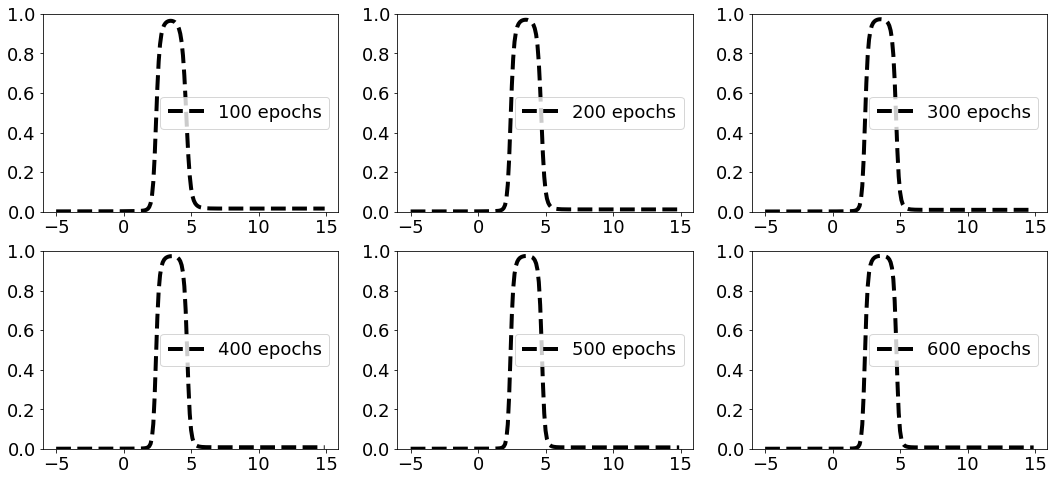

150/150 [==============================] - ETA:  - 0s 981us/step


[0.1428329887489478, 0.9533333333333334]

In [65]:
model = Sequential()
model.add(Dense(3, activation = "sigmoid", input_dim=1))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy', metrics = ['acc'])
model = load_model('my_model.h5')
plt.subplots(nrows=2  , ncols=3 , figsize=(18,8) , sharex=True , sharey=True)
for i in range(1,7):
    plt.subplot(2 , 3 , i)
    model.fit(df['petal length (cm)'], df['not versicolor'], epochs=600 , verbose=0, shuffle=False)
    probas = model.predict(petal_lengths.reshape(-1,1))[:,0]
    plt.plot( petal_lengths , probas , 'k--' , label='{} epochs'.format(i*100))
    plt.ylim((0,1))
    plt.legend()
plt.show()
model.evaluate(df['petal length (cm)'].values.reshape(-1, 1), df['not versicolor'] )

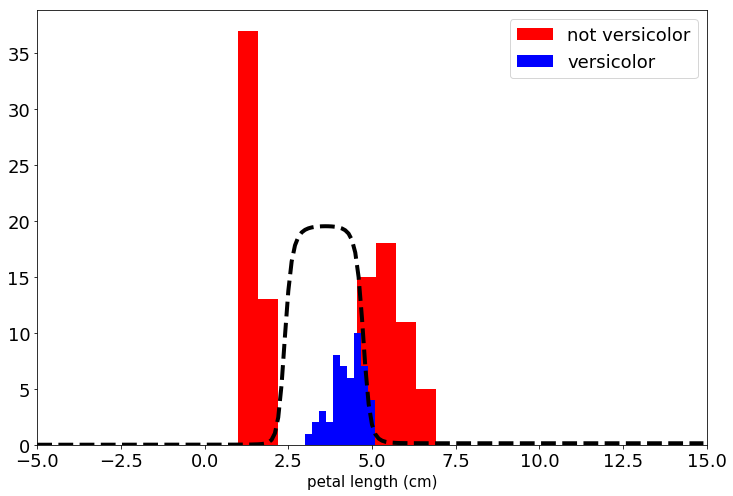

In [66]:
plot_hist(df['petal length (cm)'],df['not versicolor'])
plt.legend(["not versicolor", "versicolor"])
predicted_proba = model.predict(petal_lengths.reshape(-1,1))[:,0]
plt.plot(petal_lengths , predicted_proba*20 , 'k--')
plt.show()

# External Links

[Classification Comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[Back Propagation](http://home.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html)

[Tensorflow background](http://playground.tensorflow.org)

[Global minima](https://www.quora.com/How-important-is-to-find-the-global-minimum-instead-of-local-minimum-in-neural-networks)

[Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)


## Neural Network in action
![Alt text](result.gif)